# Import Library

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, silhouette_score, silhouette_samples

# Load Datasets

In [2]:
df_customers = pd.read_csv("Case Study Data Scientist\Case Study - Customer.csv", sep=';')
df_products = pd.read_csv("Case Study Data Scientist\Case Study - Product.csv", sep=';')
df_stores = pd.read_csv("Case Study Data Scientist\Case Study - Store.csv", sep=';')
df_transactions = pd.read_csv("Case Study Data Scientist/Case Study - Transaction.csv", sep=';')

## Preview Datasets
Dalam preview datasets, kita akan melihat lima data teratas dari masing-masing datasets. Kemudian akan dilkaukan pengecekkan tipe-tipe data pada masing-masing datasets beserta apakah terdapat atau tidaknya nilai null pada datasets. 

### Customers Datasets

In [3]:
df_customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
df_customers.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [6]:
df_customers['CustomerID'].duplicated().sum()

0

### Product Datasets

In [153]:
df_products

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [9]:
df_products.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [10]:
df_products['ProductID'].duplicated().sum()

0

### Stores Datasets

In [11]:
df_stores.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [12]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [13]:
df_stores.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [14]:
df_stores['StoreID'].duplicated().sum()

0

### Transactions Datasets

In [15]:
df_transactions.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [16]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [17]:
df_transactions.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [18]:
df_transactions['TransactionID'].duplicated().sum()

112

Dari preview keempat datasets diatas, dapat diketahui hal-hal berikut:
- Pada datasets customers terdapat nilai null pada kolom 'Marital Status'. Pada datasets yang sama kolom 'Income' memiliki tipe object, seharusnya kolom tersebut bertipe data float dikarenakan kolom terebut merujuk pada pendapatan tiap customer.
- Pada datasets stores kolom 'latitude' dan 'langitude' seharusnya beripe float bukan object.
- Pada datasets transactions kolom 'Date' seharusnya bertipe datetime dikarenakan kolom tersebut menunjukkan waktu. Selain itu pada datasets ini juga memiliki baris/record yang duplikat, hal ini disimpulkan dengan adanya duplikasi pada kolom TransactionID yang seharusnya kolom ini bersifat unik pada setiap recordnya

# Cleaning Datasets

## Customers Datasets

In [19]:
# Ubah tipe data pada kolom Income
df_customers['Income'] = df_customers['Income'].replace('[,]', '.', regex=True).astype('float')

In [20]:
# Isi data Marital Status yang kosong menjadi 'Unknown'
df_customers['Marital Status'] = df_customers['Marital Status'].fillna('Unknown')

In [21]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


Kita tidak dapat mmebuang data Customers yang memiliki nilai null pada salah satu kolomnya dikarenakan data customers tersebut terhubung dengan datasets transactions. Oleh karena itu, data yang null pada kolom 'Marital Status' diisi dengan 'Unknown' dikarenakan kita tidak mengetahui Status pernikahan dari customers tersebut.

## Stores Datasets

In [22]:
# ubah tipe data kolom latitude dan longitude
df_stores['Latitude'] = df_stores['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_stores['Longitude'] = df_stores['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [23]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


## Transactions Datasets

In [24]:
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'], format='%d/%m/%Y')

In [25]:
df_transactions['TransactionID'].value_counts()

TransactionID
TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: count, Length: 4908, dtype: int64

In [26]:
df_transactions[df_transactions['TransactionID'] == 'TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [27]:
df_transactions = df_transactions.drop_duplicates(subset='TransactionID', keep='last')

In [28]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  4908 non-null   object        
 1   CustomerID     4908 non-null   int64         
 2   Date           4908 non-null   datetime64[ns]
 3   ProductID      4908 non-null   object        
 4   Price          4908 non-null   int64         
 5   Qty            4908 non-null   int64         
 6   TotalAmount    4908 non-null   int64         
 7   StoreID        4908 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 345.1+ KB


# Merge Datasets

In [29]:
# Buat merge df_transactions dan df_customers
df_merge = pd.merge(df_transactions, df_customers, how='inner', on='CustomerID')

# merge hasil merge sebelumnya/df_merge dengan df_products
df_merge = pd.merge(df_merge, df_products[['ProductID', 'Product Name']], how='inner', on='ProductID')

# merge hasil merge sebelumnya/df_merge dengan df_stores
df_merge = pd.merge(df_merge, df_stores, how='inner', on='StoreID')

In [30]:
df_all = df_merge.copy()

# Descriptive Analysis

In [31]:
df_all.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [32]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4908 non-null   object        
 1   CustomerID      4908 non-null   int64         
 2   Date            4908 non-null   datetime64[ns]
 3   ProductID       4908 non-null   object        
 4   Price           4908 non-null   int64         
 5   Qty             4908 non-null   int64         
 6   TotalAmount     4908 non-null   int64         
 7   StoreID         4908 non-null   int64         
 8   Age             4908 non-null   int64         
 9   Gender          4908 non-null   int64         
 10  Marital Status  4908 non-null   object        
 11  Income          4908 non-null   float64       
 12  Product Name    4908 non-null   object        
 13  StoreName       4908 non-null   object        
 14  GroupStore      4908 non-null   object        
 15  Type

In [33]:
print("Banyak baris dan kolom dari seluruh datasets adalah sebanyak {} baris dan {} kolom".format(df_all.shape[0], df_all.shape[1]))

Banyak baris dan kolom dari seluruh datasets adalah sebanyak 4908 baris dan 18 kolom


In [34]:
df_all.describe(include='number')

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,221.351059,9686.695192,3.638753,32228.708231,7.497351,40.001834,0.453341,8.616498,-2.938767,109.604187
std,129.691955,4601.911273,1.851338,19646.821117,4.031337,12.832058,0.497869,6.520219,4.320241,8.357284
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.220000,-6.914864,104.756554
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.640000,-3.654703,110.370529
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.780000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,5.548290,128.190643


In [35]:
df_all.describe(include='object')

,TransactionID,ProductID,Marital Status,Product Name,StoreName,GroupStore,Type
count,4908,4908,4908,4908,4908,4908,4908
unique,4908,10,3,10,12,7,2
top,TR11369,P5,Married,Thai Tea,Lingga,Prima,General Trade
freq,1,798,3689,798,717,1058,2794


# Analisis Regresi

## Analisis Time Series

In [36]:
df_all[['Date', 'Qty']].sort_values('Date')

,Date,Qty
0,2022-01-01,4
4706,2022-01-01,7
4705,2022-01-01,4
2025,2022-01-01,1
1249,2022-01-01,7
...,...,...
2132,2022-12-31,2
720,2022-12-31,1
548,2022-12-31,2
2694,2022-12-31,4


In [37]:
df_tsa = df_all[['Date', 'Qty']]

In [38]:
df_tsa = df_tsa.groupby('Date').sum()

In [39]:
df_tsa

,Qty
Date,
2022-01-01,47
2022-01-02,54
2022-01-03,63
2022-01-04,43
2022-01-05,23
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


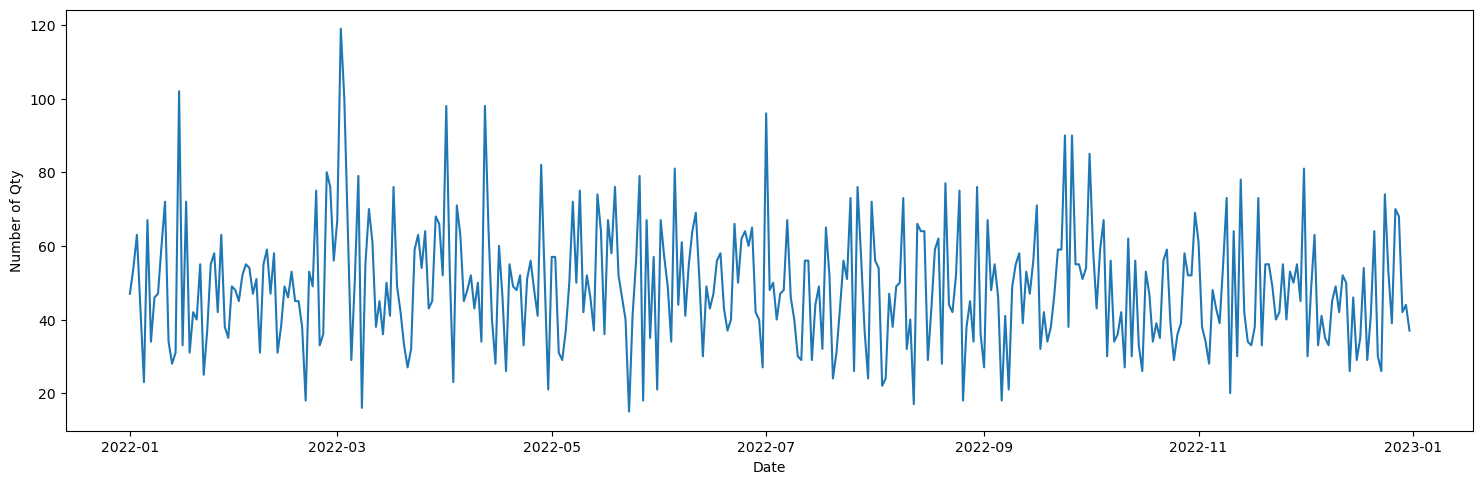

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Number of Qty')
plt.tight_layout()
plt.plot(df_tsa)
plt.show()

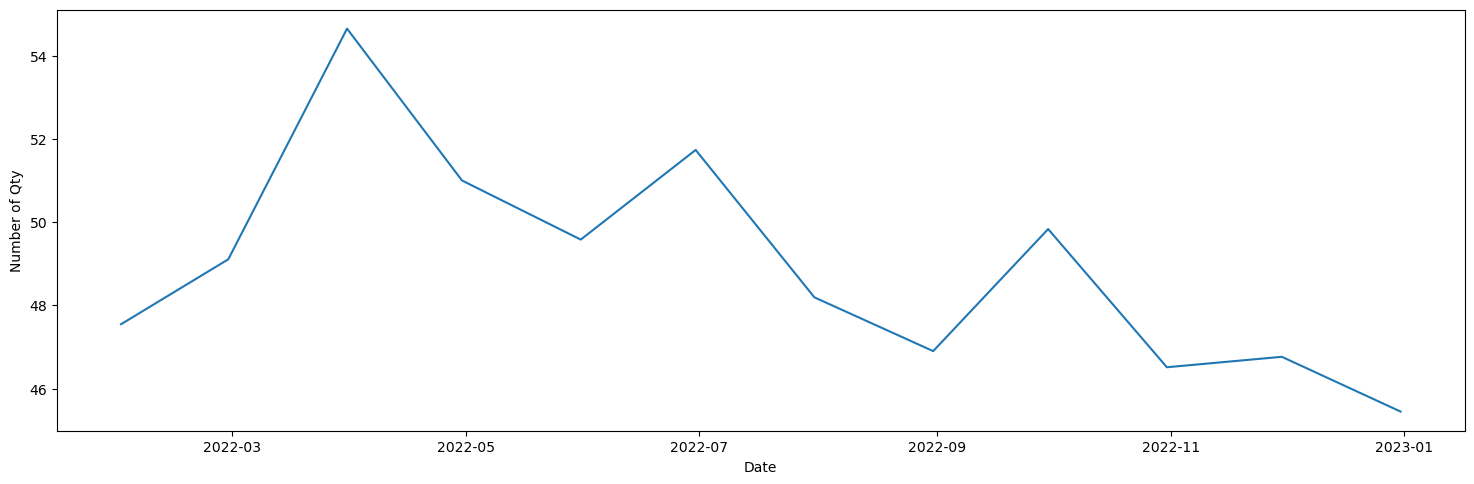

In [41]:
## plot graph
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Number of Qty')
plt.tight_layout()
plt.plot(df_tsa.resample('M').mean())
plt.show()

### STL

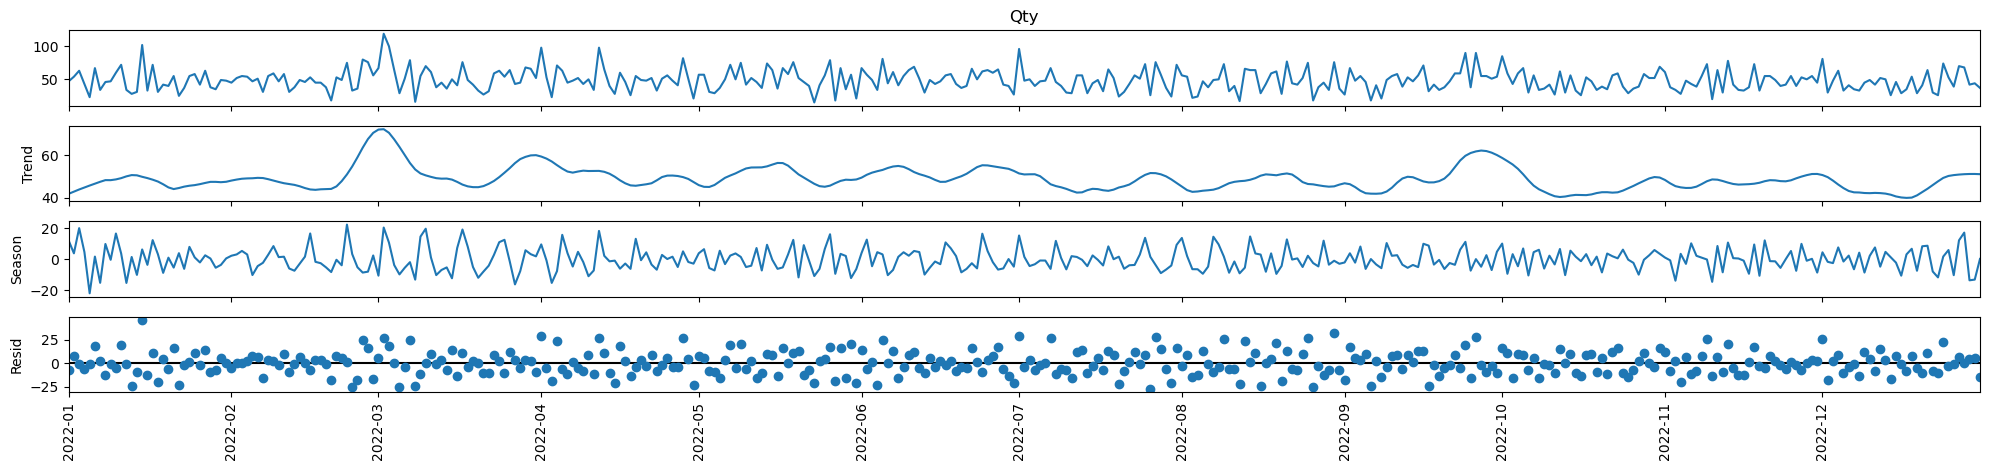

In [42]:
res = STL(df_tsa['Qty']).fit()
fig = res.plot()
fig.set_figwidth(20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Decomposed Time Series

In [43]:
decomposed = sm.tsa.seasonal_decompose(df_tsa['Qty'])

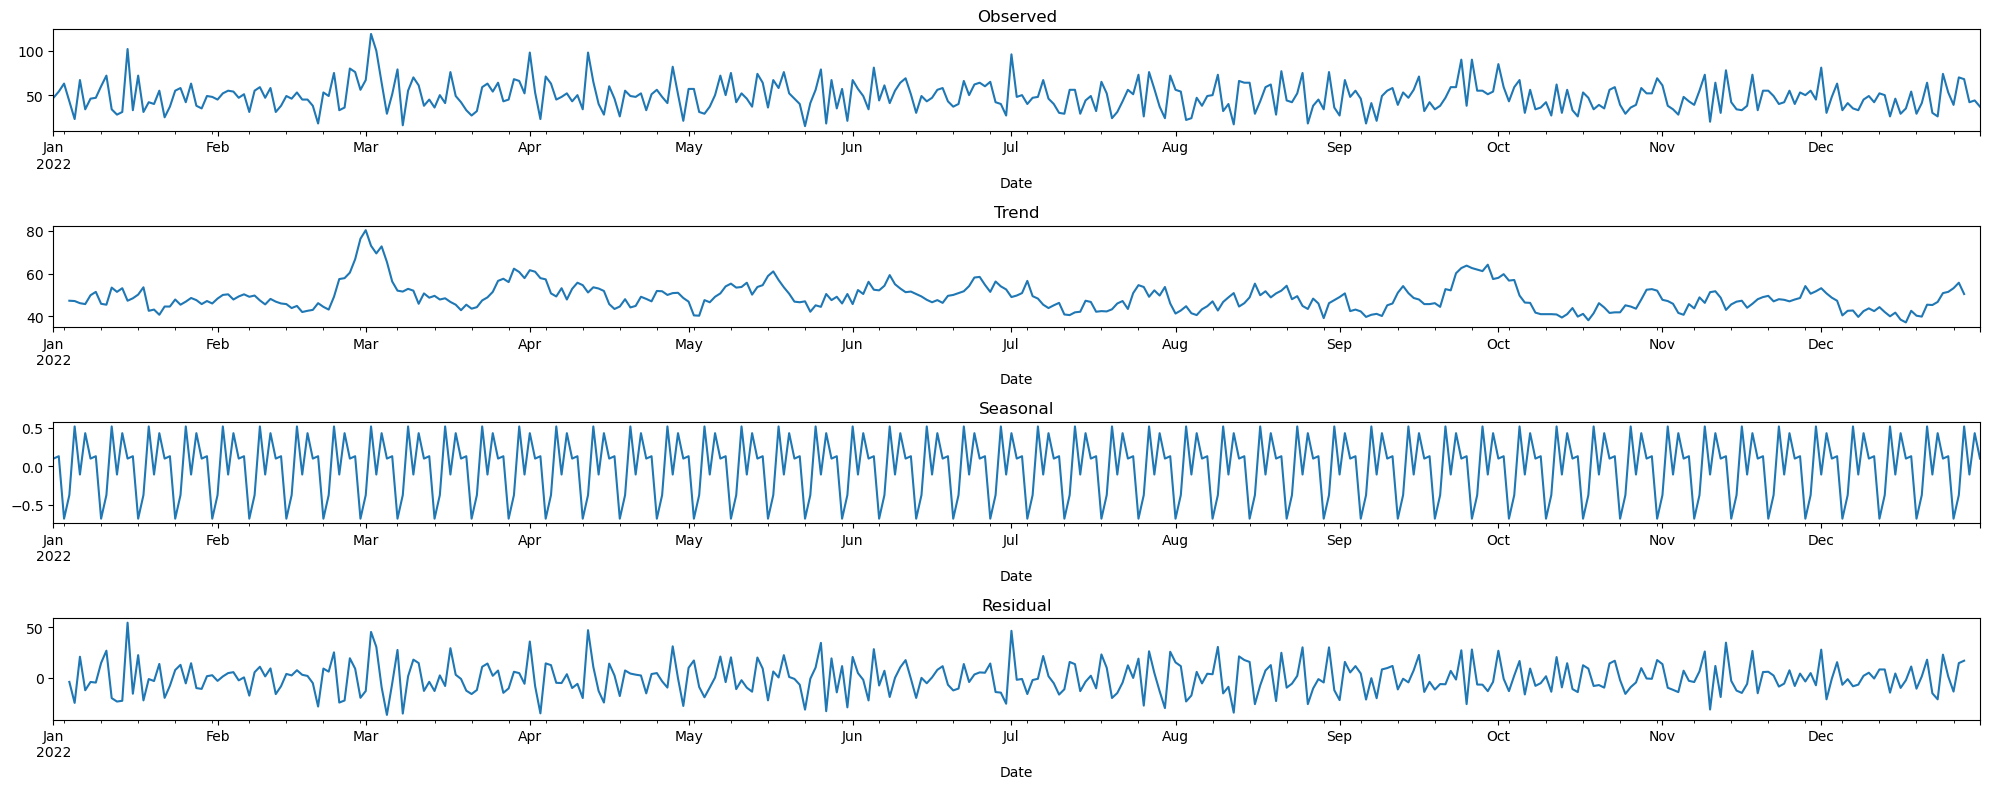

In [44]:
fig, axes = plt.subplots(4, 1, figsize=(20, 8))

decomposed.observed.plot(ax=axes[0])
axes[0].set_title("Observed")

decomposed.trend.plot(ax=axes[1])
axes[1].set_title("Trend")

decomposed.seasonal.plot(ax=axes[2])
axes[2].set_title("Seasonal")

decomposed.resid.plot(ax=axes[3])
axes[3].set_title("Residual")

plt.tight_layout()
plt.show()


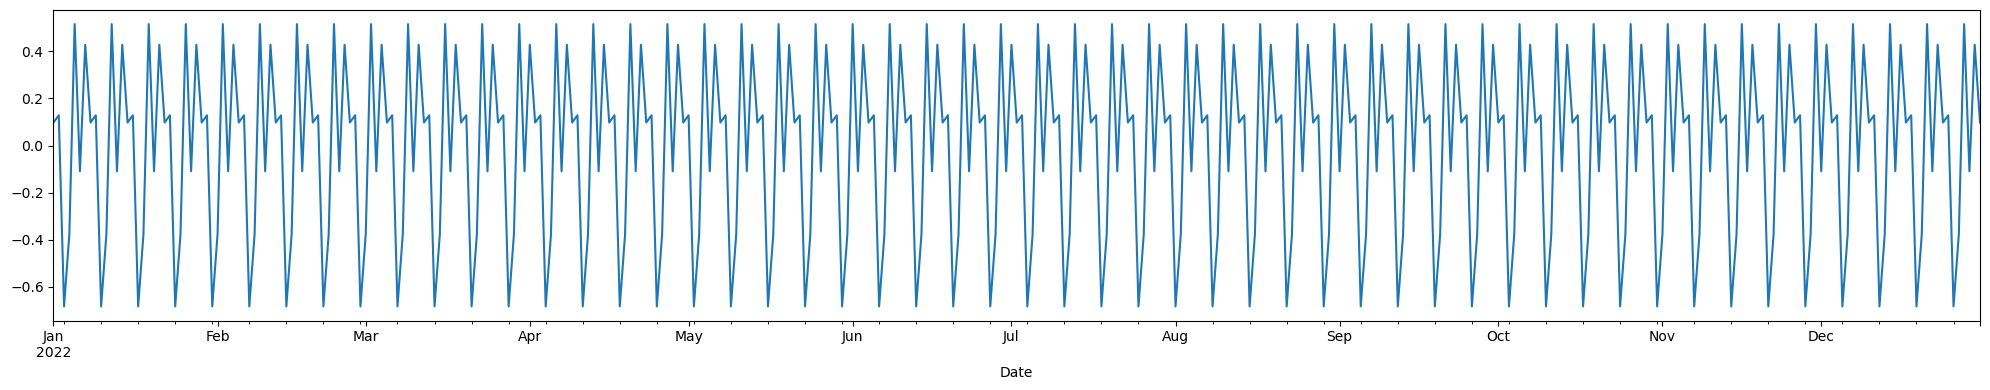

In [45]:
fig, axes = plt.subplots(figsize=(20, 4))
decomposed.seasonal.plot()
plt.tight_layout()
plt.show()

### Data Stationary or Not

#### Menggunakan rolling dan visualisasi

In [46]:
rolmean = df_tsa.rolling(window=30, step=1).mean()
rolstd = df_tsa.rolling(window=30, step=1).std()

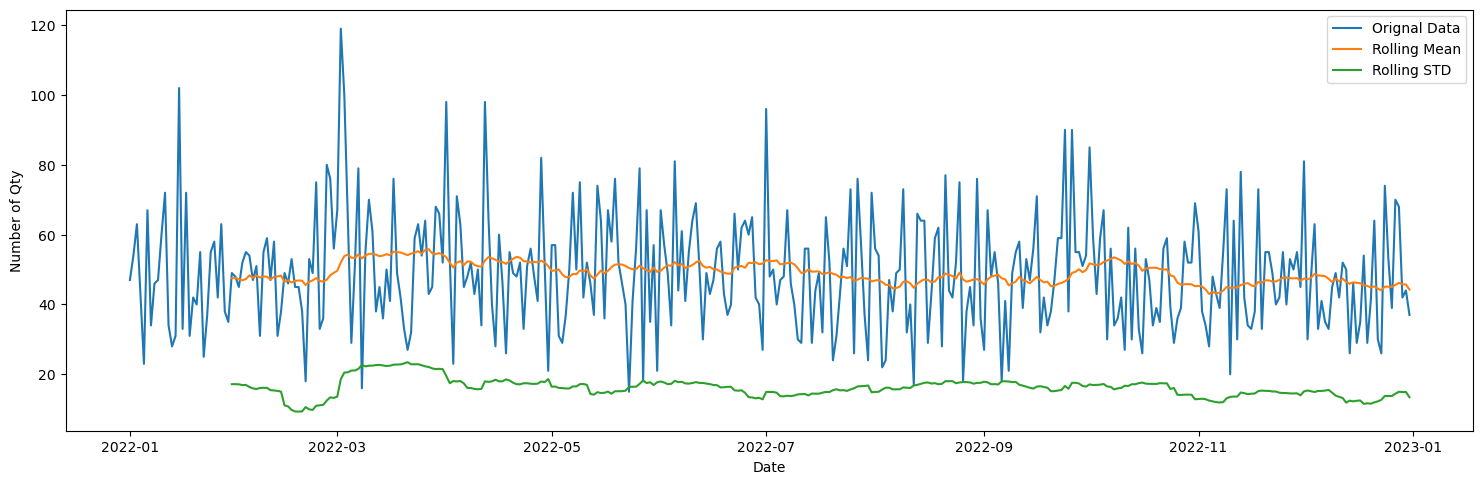

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Number of Qty')
plt.tight_layout()
plt.plot(df_tsa, label='Orignal Data')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling STD')
plt.legend(loc='best')
plt.show()

#### Metode ADF

In [48]:
adf_result = adfuller(df_tsa)

In [49]:
print('ADF Statistik: {:.4f}'.format(adf_result[0]))
print('p-value: {:.4f}'.format(adf_result[1]))
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t{}: {:.3f}'.format(key, value))
if adf_result[1] > 0.05:
    print("Terima H0: Data Non-Stationary")
else:
    print("Tolak H0: Data Stationary")

ADF Statistik: -19.4260
p-value: 0.0000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Tolak H0: Data Stationary


## Split data

In [50]:
# split data
split = int(np.round(df_tsa.shape[0] * 0.8))
df_tsa_train, df_tsa_test = df_tsa.iloc[:split], df_tsa.iloc[split:]

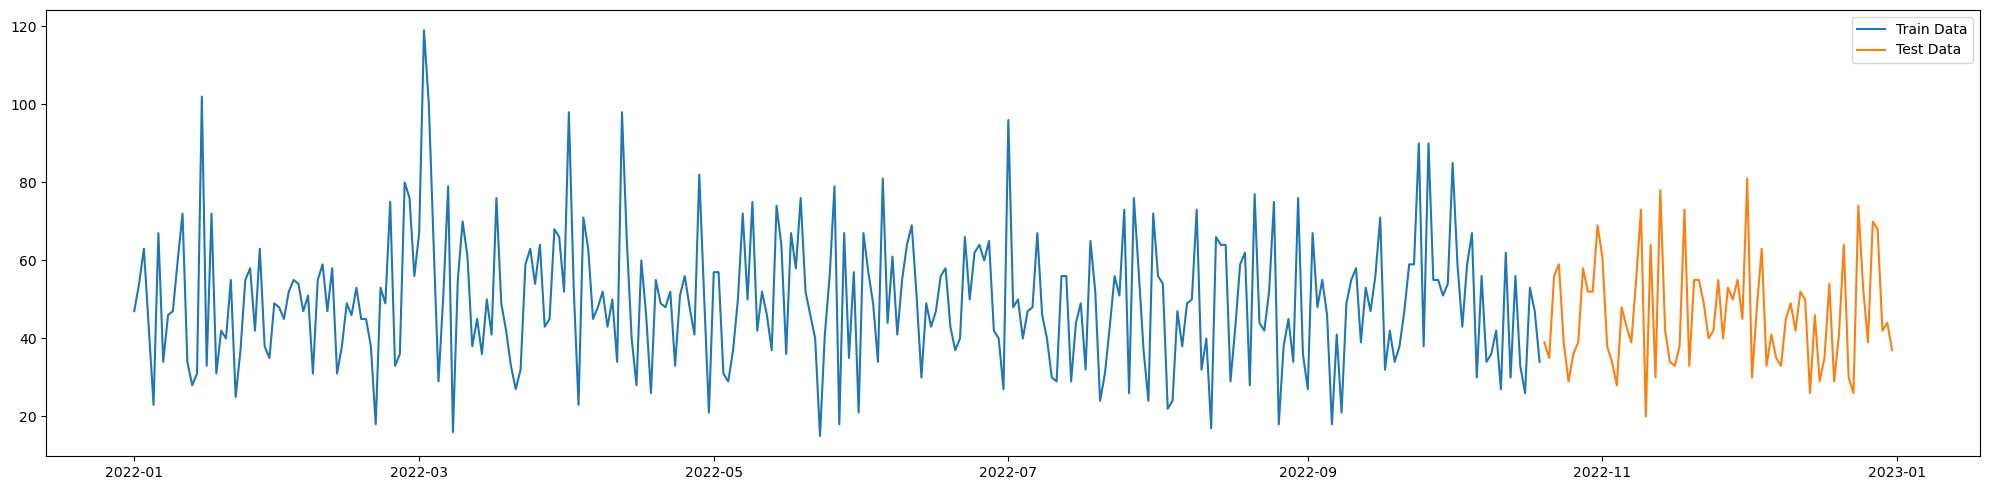

In [51]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df_tsa_train['Qty'], label='Train Data')
plt.plot(df_tsa_test['Qty'], label='Test Data')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Forecast Qty dengan ARIMA

In [52]:
def evaluation(y_true, y_pred, title=None):
    if title:
        print(title)
    print("Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(y_true,y_pred)))
    print("Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mean_absolute_percentage_error(y_true, y_pred) * 100))

### Auto ARIMA

Menggunakan Auto ARIMA untuk menemukan nilai p, d dan q dan model dengan menguji coba kombinasi order dan memperkecil nilai AIC

In [53]:
auto_model = auto_arima(df_tsa_train, trace=True, error_action='ignore', suppress_warnings=True)
auto_model.fit(df_tsa_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2489.797, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2482.836, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2484.802, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2484.801, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3142.590, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2486.808, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.573 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [54]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:                        SARIMAX   Log Likelihood               -1239.418
Date:                Sun, 01 Oct 2023   AIC                           2482.836
Time:                        11:40:17   BIC                           2490.189
Sample:                    01-01-2022   HQIC                          2485.781
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.6027      1.059     46.831      0.000      47.527      51.679
sigma2       284.6573     20.907     13.615      0.000     243.680     325.634
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                28.99
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.62
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
y_pred_autoARIMA = auto_model.predict(len(df_tsa_test))
y_pred_autoARIMA

2022-10-20    49.60274
2022-10-21    49.60274
2022-10-22    49.60274
2022-10-23    49.60274
2022-10-24    49.60274
                ...   
2022-12-27    49.60274
2022-12-28    49.60274
2022-12-29    49.60274
2022-12-30    49.60274
2022-12-31    49.60274
Freq: D, Length: 73, dtype: float64

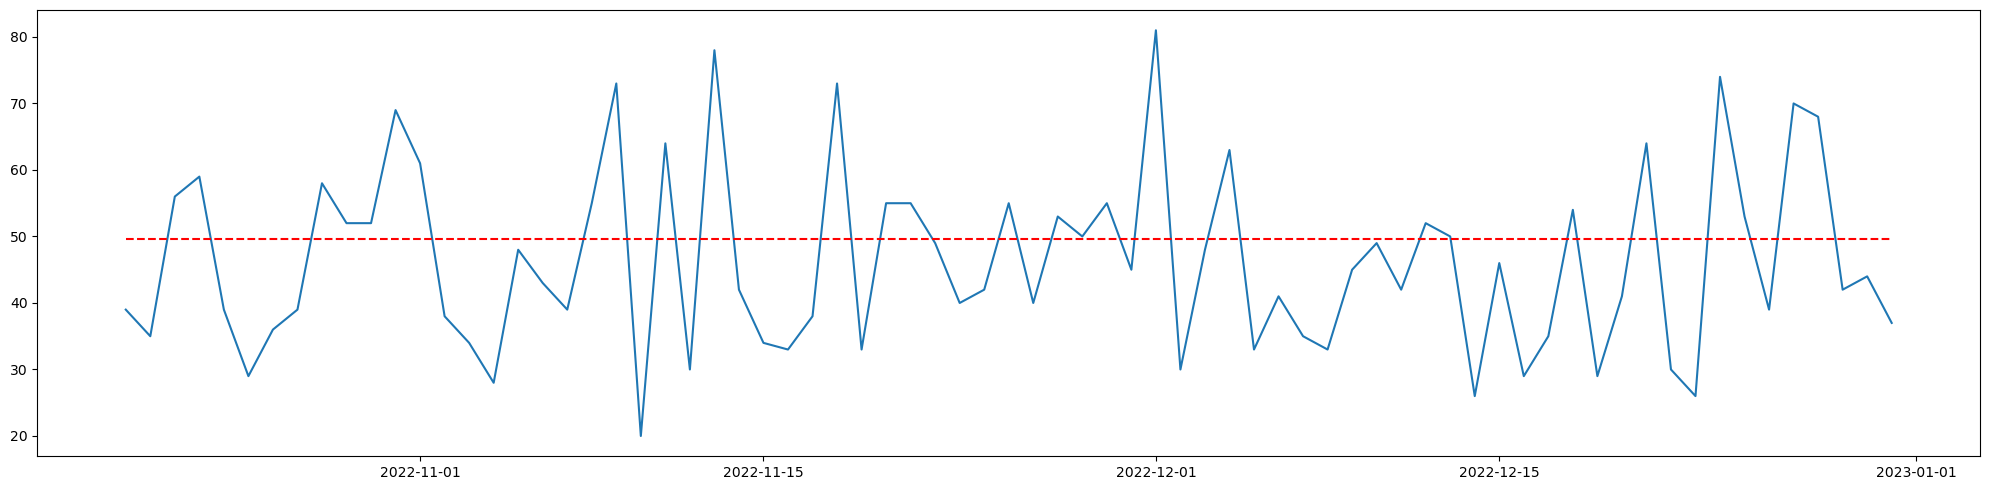

In [56]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df_tsa_test, label='Test Data')
plt.plot(y_pred_autoARIMA, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [57]:
evaluation(df_tsa_test['Qty'], y_pred_autoARIMA)

Mean Absolute Error (MAE): 11.95
Root Mean Squared Error (RMSE): 14.20
Mean Absolute Percentage Error (MAPE): 30.13%


### ARIMA

#### Menemukan p, d dan q optimal

##### PACF dan ACF

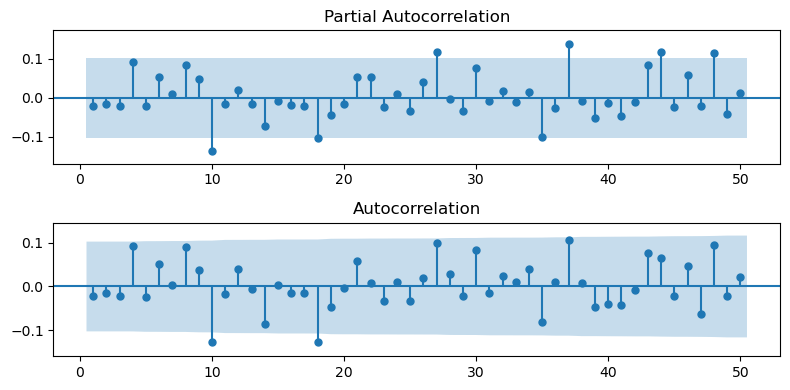

In [58]:
fig, axes = plt.subplots(2, 1, figsize=(8, 4))
plot_pacf(df_tsa['Qty'], lags=50, zero=False, auto_ylims=True, ax=axes[0])
plot_acf(df_tsa['Qty'], lags=50, zero=False, auto_ylims=True, ax=axes[1])
plt.tight_layout()
plt.show()

##### Pandas Auto Correlation

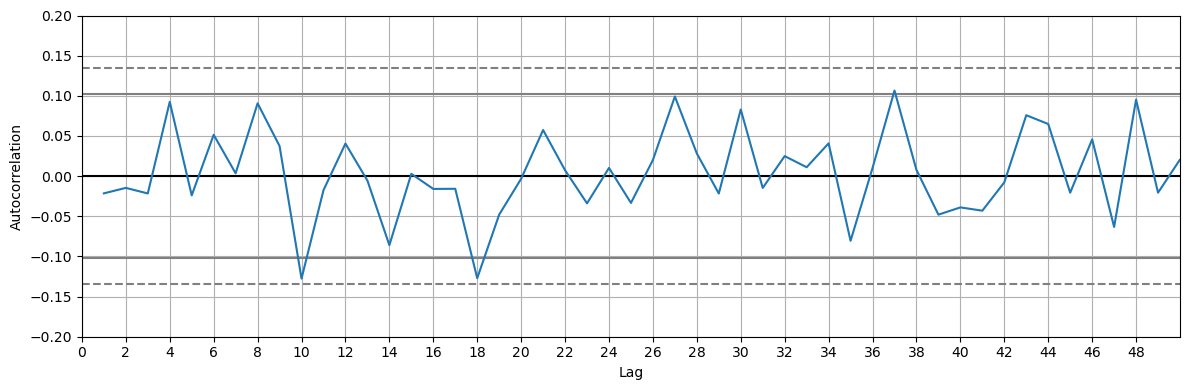

In [59]:
fig, ax = plt.subplots(figsize=(12, 4))
pd.plotting.autocorrelation_plot(df_tsa['Qty'], ax=ax)
plt.ylim(-0.2, 0.2)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, step=2))
plt.tight_layout()
plt.show()

#### Membuat model ARIMA

In [60]:
y = df_tsa_train['Qty']
ARIMA_model = ARIMA(y, order=(10, 0, 10)) 
ARIMA_model = ARIMA_model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:               ARIMA(10, 0, 10)   Log Likelihood               -1221.424
Date:                Sun, 01 Oct 2023   AIC                           2486.849
Time:                        11:40:20   BIC                           2567.737
Sample:                    01-01-2022   HQIC                          2519.249
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6594      1.090     45.540      0.000      47.522      51.797
ar.L1          0.5096      0.180      2.835      0.005       0.157       0.862
ar.L2         -0.1122      0.171     -0.656      0.512      -0.448       0.223
ar.L3          0.1133      0.125      0.904      0.366      -0.132       0.359
ar.L4          0.3546      0.133      2.675      0.007       0.095       0.614
ar.L5         -0.5018      0.175     -2.873      0.004      -0.844      -0.159
ar.L6          0.2569      0.154      1.666      0.096      -0.045       0.559
ar.L7          0.0255      0.133      0.192      0.848      -0.234       0.285
ar.L8         -0.2349      0.139     -1.687      0.092      -0.508       0.038
ar.L9          0.4227      0.152      2.776      0.006       0.124       0.721
ar.L10        -0.7295      0.148     -4.944      0.000      -1.019      -0.440
ma.L1         -0.5411      0.528     -1.026      0.305      -1.575       0.493
ma.L2          0.0674      0.670      0.101      0.920      -1.246       1.381
ma.L3         -0.1328      0.527     -0.252      0.801      -1.165       0.900
ma.L4         -0.2660      0.421     -0.631      0.528      -1.092       0.560
ma.L5          0.4833      0.216      2.239      0.025       0.060       0.907
ma.L6         -0.1497      0.444     -0.337      0.736      -1.020       0.721
ma.L7         -0.1110      0.649     -0.171      0.864      -1.383       1.161
ma.L8          0.4122      0.747      0.552      0.581      -1.052       1.877
ma.L9         -0.5457      0.627     -0.871      0.384      -1.774       0.682
ma.L10         0.6928      0.480      1.444      0.149      -0.247       1.633
sigma2       248.9101    139.119      1.789      0.074     -23.759     521.579
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                19.28
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.49
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
y_pred_ARIMA = ARIMA_model.get_forecast(len(df_tsa_test))

In [63]:
y_pred_ARIMA_df = y_pred_ARIMA.conf_int()
y_pred_ARIMA_df['predictions'] = ARIMA_model.predict(start=y_pred_ARIMA_df.index[0], end=y_pred_ARIMA_df.index[-1])
y_pred_ARIMA_df

,lower Qty,upper Qty,predictions
2022-10-20,22.554484,84.711787,53.633135
2022-10-21,12.621522,74.811269,43.716396
2022-10-22,26.137562,88.412637,57.275100
2022-10-23,17.882166,80.226480,49.054323
2022-10-24,17.773298,80.274153,49.023725
...,...,...,...
2022-12-27,14.695880,81.105977,47.900929
2022-12-28,11.655954,78.070219,44.863086
2022-12-29,14.550334,80.964869,47.757601
2022-12-30,15.416218,81.830513,48.623366


#### Evaluasi

In [64]:
evaluation(df_tsa_test['Qty'], y_pred_ARIMA_df['predictions'])

Mean Absolute Error (MAE): 12.82
Root Mean Squared Error (RMSE): 15.12
Mean Absolute Percentage Error (MAPE): 31.78%


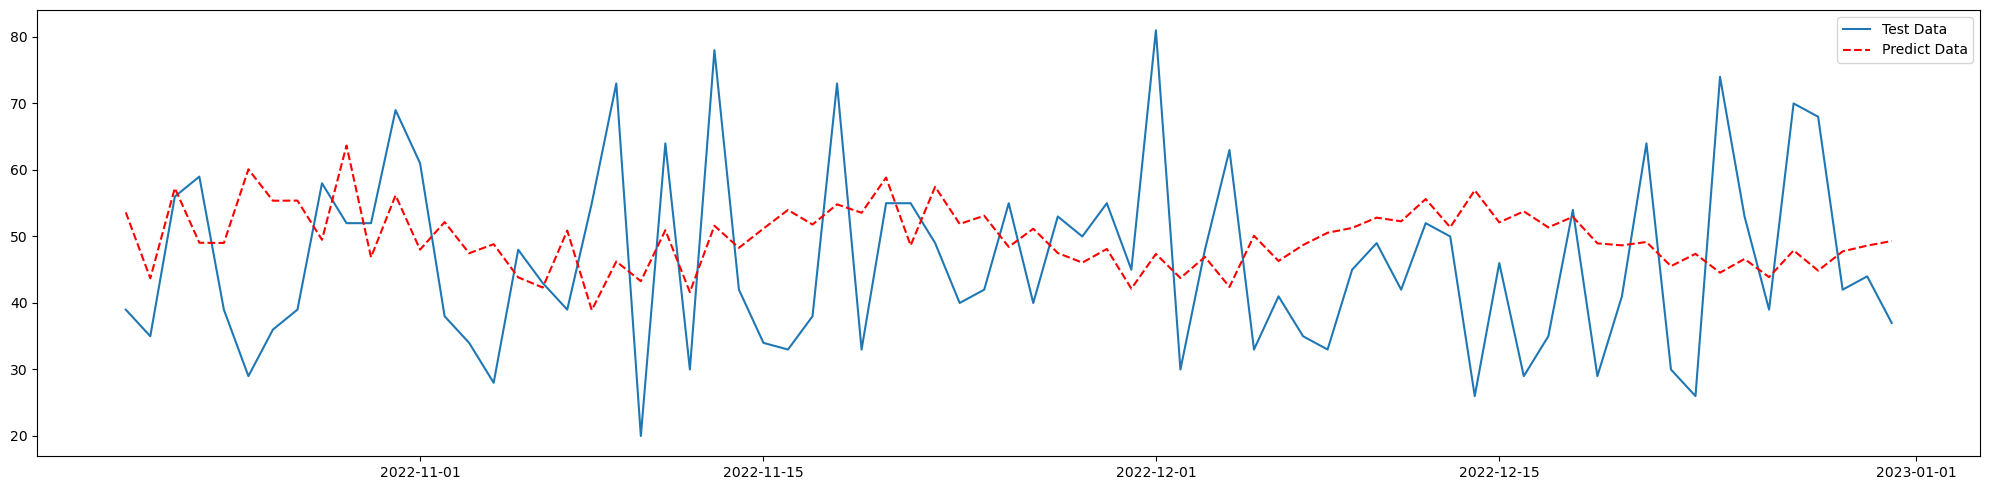

In [65]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df_tsa_test, label='Test Data')
plt.plot(y_pred_ARIMA_df['predictions'], color='red', linestyle='--', label='Predict Data')
plt.legend()
plt.tight_layout()
plt.show()

### Kesimpulan

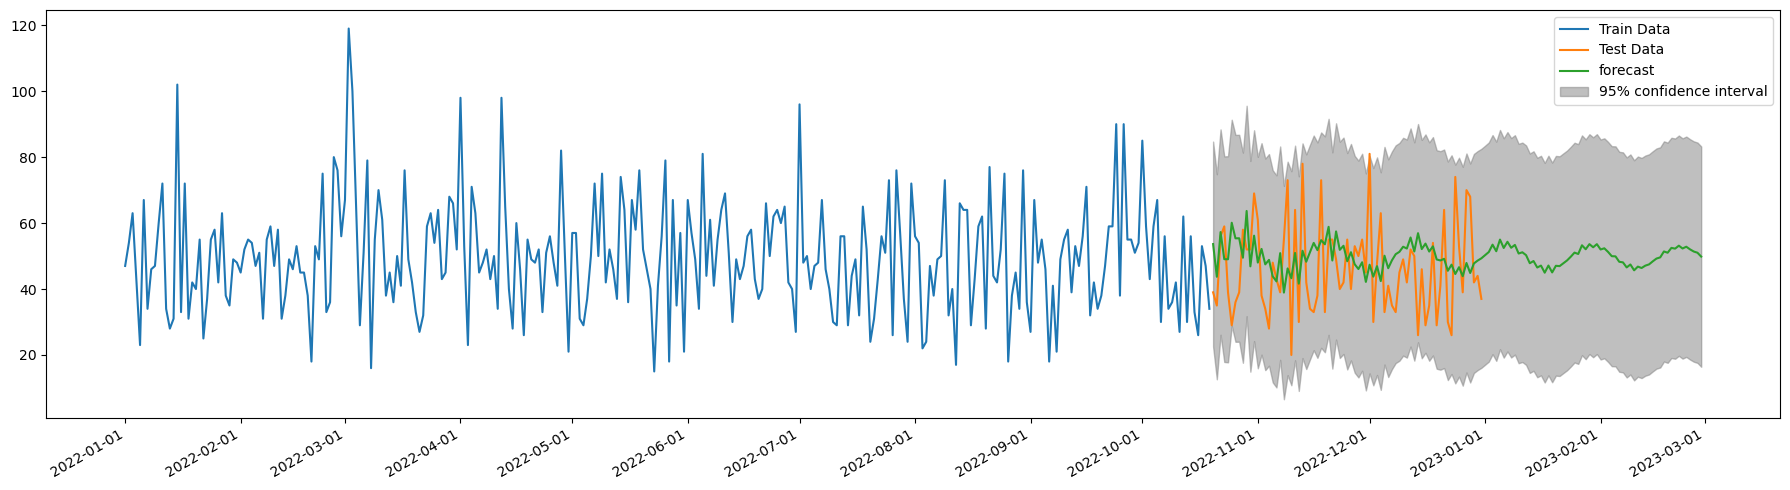

In [66]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(df_tsa_train, label='Train Data')
ax.plot(df_tsa_test, label='Test Data')
plot_predict(ARIMA_model, start=y_pred_ARIMA_df.index[0], end=pd.Timestamp('2023-02-28'), ax=ax)
plt.xticks(pd.date_range(start='2022-01-01', end='2023-03-01', freq='MS'))
plt.tight_layout()
plt.show()

# Analisis Klasterisasi

## Persiapan Datasets

In [67]:
df_all.head(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
5,TR38909,285,2022-03-04,P3,7500,4,30000,12,20,0,Single,0.00,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
6,TR36491,117,2022-01-03,P3,7500,4,30000,12,45,1,Married,12.55,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
7,TR20045,243,2022-01-20,P3,7500,1,7500,12,38,0,Married,3.34,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
8,TR12061,189,2022-03-28,P3,7500,5,37500,12,59,1,Single,5.15,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
9,TR39272,176,2022-12-21,P3,7500,5,37500,12,54,1,Married,18.32,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [68]:
# Cek korelasi antara feature
df_corr = df_all.select_dtypes(include='number').corr()

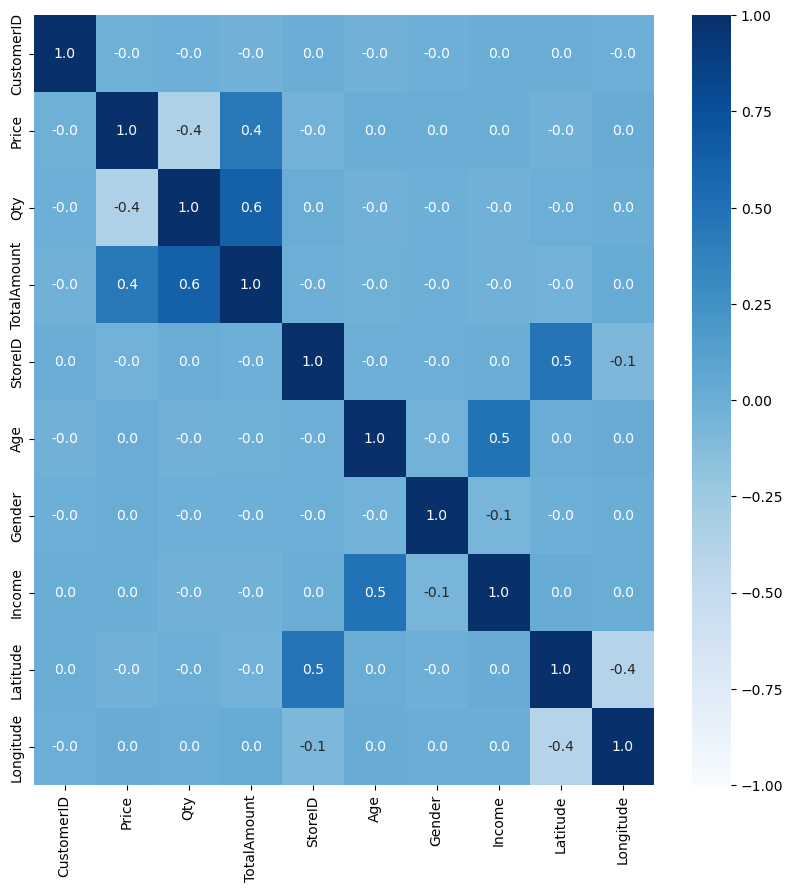

In [69]:
# heatmap korelasi antar feature
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, cmap='Blues', fmt='.1f', annot=True, vmin=-1)
plt.show()

In [108]:
df_cust_seg = df_all.groupby('CustomerID').agg(
    Total_Transactions = ('TransactionID', 'count'),
    Total_Qty = ('Qty', 'sum'),
    Total_Amount = ('TotalAmount', 'sum')
)

In [109]:
df_cust_seg

,Total_Transactions,Total_Qty,Total_Amount
CustomerID,,,
1,17,60,623300
2,12,56,382300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,17,62,530800


In [110]:
df_cust_seg.columns[0]

'Total_Transactions'

## Preprocess

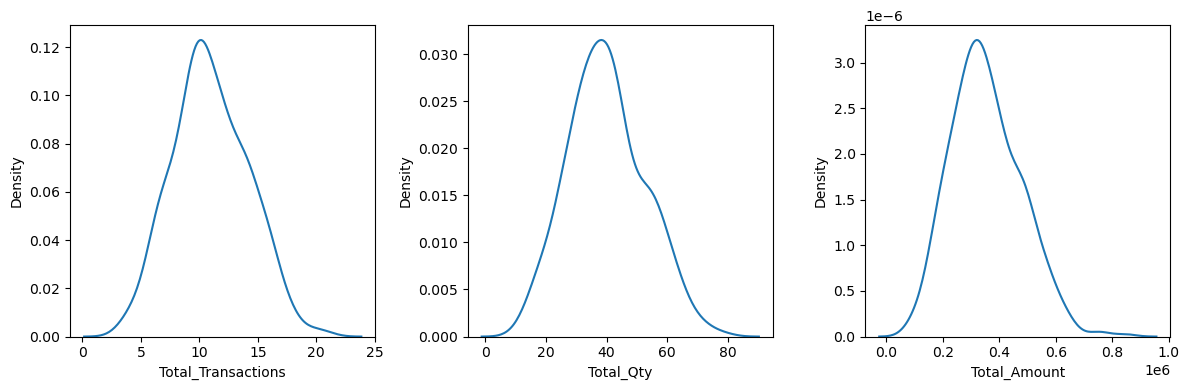

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    sns.kdeplot(data=df_cust_seg, x=df_cust_seg.columns[i], ax=ax)
plt.tight_layout()
plt.show()

<Axes: >

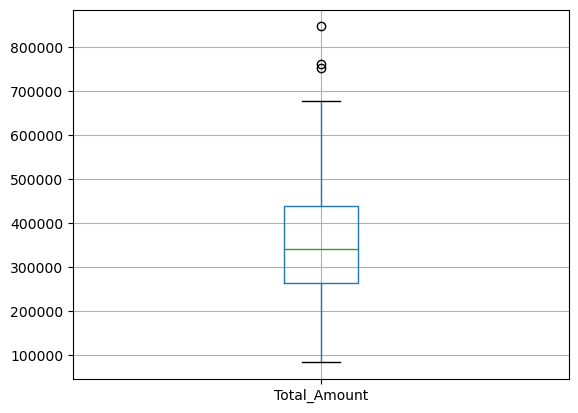

In [151]:
df_cust_seg[['Total_Amount']].boxplot()

In [112]:
scaler = StandardScaler()

In [113]:
scaler_data = scaler.fit_transform(df_cust_seg)

In [114]:
scaler_data

array([[ 1.87038514,  1.58585089,  2.18083012],
       [ 0.31694375,  1.269424  ,  0.23014166],
       [ 1.24900858,  1.269424  ,  0.74735739],
       ...,
       [ 1.87038514,  1.74406434,  1.43212189],
       [ 0.00625547,  0.16192987,  0.56200152],
       [ 0.31694375, -0.23360375,  0.38797744]])

## Pemilihan Jumlah Klaster

In [115]:
k = range(2, 15)
kmeans_list = []
for i in k:
    cls_kmeans = KMeans(i, random_state=42, n_init='auto')
    cls_kmeans.fit(scaler_data)
    kmeans_list.append(cls_kmeans)


In [116]:
inertia = []
sil_score = []

for i in kmeans_list:
    # cls_kmeans = KMeans(i, random_state=42, n_init='auto')
    # cls_kmeans.fit(scaler_data)
    labels = i.labels_
    inertia.append(i.inertia_)
    sil_score.append(silhouette_score(scaler_data, labels, random_state=42))

[536.8788931154642, 310.473985150064, 235.13947167604042, 192.78766267976224, 173.48125250735524, 162.3156016849759, 146.04554025985905, 133.0979626613953, 123.59496463502104, 118.94216724581163, 113.58722681663464, 103.88918577379435, 99.5182904935203]


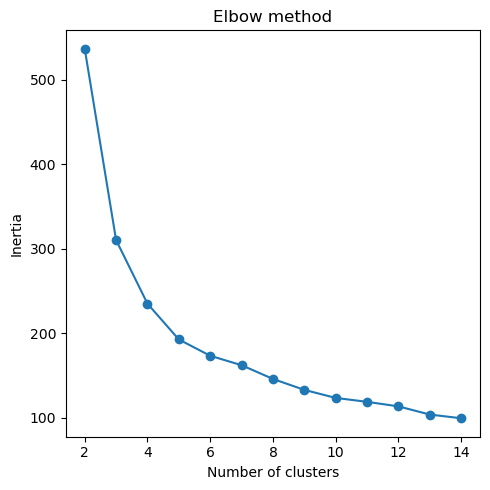

In [117]:
print(inertia)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(k, inertia, marker='o')
ax.set_title('Elbow method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.tight_layout()
plt.show()

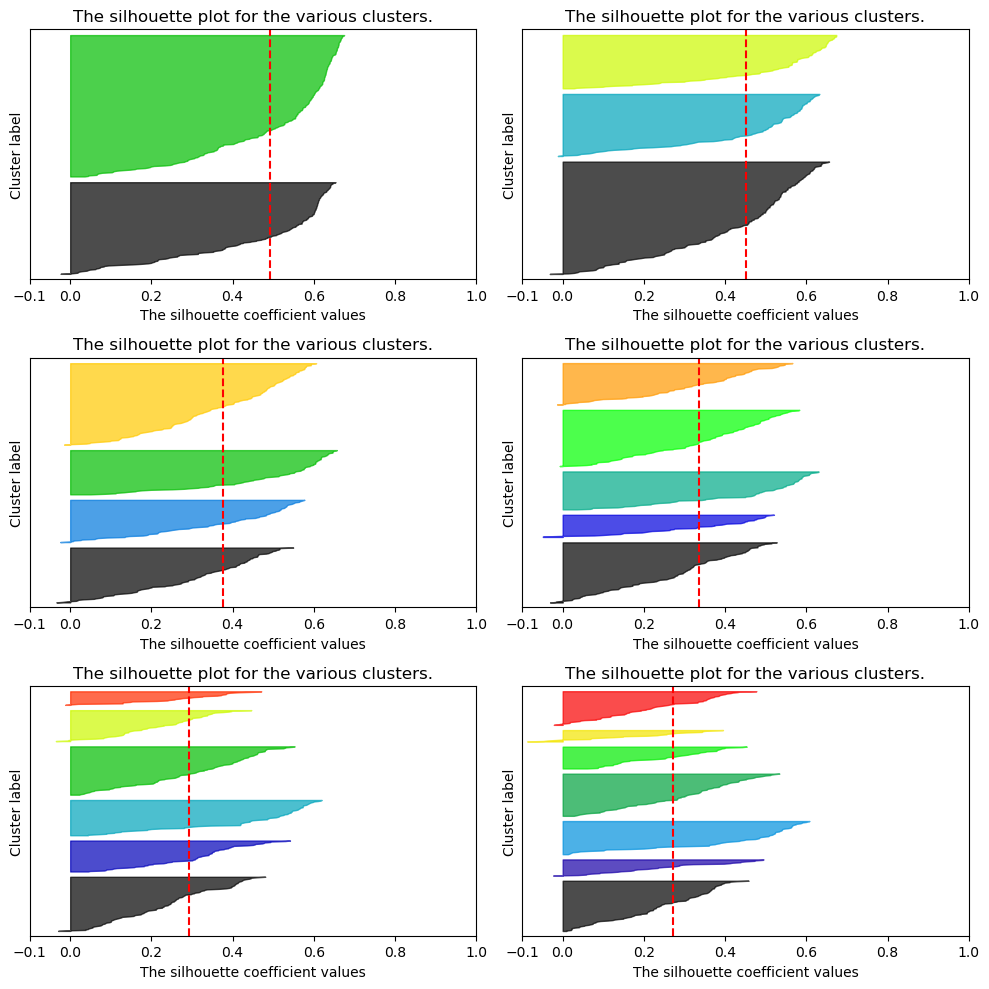

In [118]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for j, kmeans in enumerate(kmeans_list[:6]):
    q, mod = divmod(j, 2)
    axes[q][mod].set_xlim([-0.1, 1])
    axes[q][mod].set_ylim([0, len(scaler_data) + (len(kmeans.cluster_centers_) + 1) * 10])
    cls_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaler_data, cls_labels)
   
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaler_data, cls_labels)

    y_lower = 10
    for i in range(len(kmeans_list)):
        ith_cluster_silhouette_values = sample_silhouette_values[cls_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(kmeans.cluster_centers_))
        axes[q][mod].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # # Label the silhouette plots with their cluster numbers at the middle
        # axes[q][mod].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    axes[q][mod].set_title("The silhouette plot for the various clusters.")
    axes[q][mod].set_xlabel("The silhouette coefficient values")
    axes[q][mod].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axes[q][mod].axvline(x=silhouette_avg, color="red", linestyle="--")
    axes[q][mod].set_yticks([])  # Clear the yaxis labels / ticks
    axes[q][mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.tight_layout()
plt.show()

## Model K-Means dengan Optimum K

In [119]:
cls_ml = KMeans(4, n_init='auto', random_state=42)
cls_ml.fit(scaler_data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [120]:
seg_result = df_cust_seg.copy()
seg_result['Cluster'] = cls_ml.labels_
seg_result['Cluster'] = seg_result['Cluster'].astype('category')

In [121]:
seg_result

,Total_Transactions,Total_Qty,Total_Amount,Cluster
CustomerID,,,,
1,17,60,623300,1
2,12,56,382300,0
3,15,56,446200,1
4,10,46,302500,3
5,7,27,268600,2
...,...,...,...,...
443,16,59,485100,1
444,18,62,577700,1
445,17,62,530800,1


In [126]:
seg_result.groupby('Cluster').agg(['sum', 'mean']).round(2).applymap(lambda x: f"{x:,}")

Total_Transactions        Total_Qty        Total_Amount            
                       sum   mean       sum   mean          sum        mean
Cluster                                                                    
0                    1,376  12.51     4,997  45.43   44,390,700  403,551.82
1                    1,317  15.49     4,974  58.52   45,547,200  535,849.41
2                      600   6.74     2,081  23.38   17,519,400  196,847.19
3                    1,615   9.91     5,807  35.63   50,721,200  311,173.01

In [122]:
px.scatter_3d(data_frame=seg_result, 
              x='Total_Transactions', y='Total_Qty', z='Total_Amount', 
              color='Cluster', size_max=1, width=700, height=700)

- Cluster 0: Pelanggan Reguler
- Cluster 1: Pelanggan Premium
- Cluster 2: Pelanggan Hemat
- Cluster 3: Pelanggan Ekonomis

In [134]:
cls_names = {
    0: 'Reguler',
    1: 'Premium',
    2: 'Hemat',
    3: 'Ekonomis'}

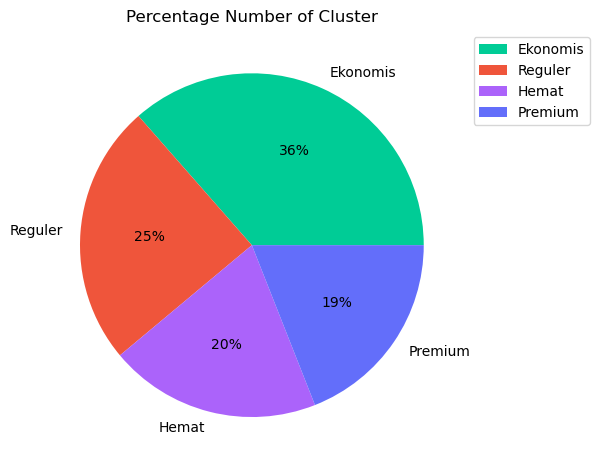

In [154]:
plt.pie(seg_result['Cluster'].value_counts(), 
        labels=[cls_names[i] for i in seg_result['Cluster'].value_counts().index], 
        autopct='%.0f%%',
        colors=['#00CC96', '#EF553B', '#AB63FA', '#636EFA'])
plt.title('Percentage Number of Cluster')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [155]:
df_clustered = pd.merge(df_merge, seg_result.reset_index()[['CustomerID', 'Cluster']], how='inner', on='CustomerID')

In [160]:
df_clustered

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Cluster
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,3
1,TR51183,328,2022-11-19,P5,4200,4,16800,1,36,0,Married,10.53,Thai Tea,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,3
2,TR97172,328,2022-05-21,P1,8800,5,44000,1,36,0,Married,10.53,Choco Bar,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,3
3,TR57013,328,2022-09-15,P7,9400,6,56400,1,36,0,Married,10.53,Coffee Candy,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,3
4,TR5063,328,2022-12-07,P5,4200,4,16800,5,36,0,Married,10.53,Thai Tea,Bonafid,Gita,General Trade,-7.250445,112.768845,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,TR71291,148,2022-09-19,P7,9400,6,56400,3,45,0,Married,19.68,Coffee Candy,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,2
4904,TR69496,148,2022-12-17,P2,3200,7,22400,8,45,0,Married,19.68,Ginger Candy,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753,2
4905,TR86426,148,2022-08-15,P10,15000,3,45000,6,45,0,Married,19.68,Cheese Stick,Lingga,Lingga,Modern Trade,-5.135399,119.423790,2
4906,TR43057,148,2022-05-11,P7,9400,4,37600,11,45,0,Married,19.68,Coffee Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,2


In [156]:
uq_label = np.sort(df_clustered['Cluster'].unique())

In [157]:
dfs_clustered = {i: df_clustered[df_clustered['Cluster'] == i] for i in uq_label}

In [166]:
for cls in uq_label:
    print('Cluster', cls)
    prod_anlys = dfs_clustered[cls].groupby(['Product Name']).agg({'Qty':'sum'}).sort_values('Qty', ascending=False)
    print(prod_anlys)
    print('============')

Cluster 0
               Qty
Product Name      
Thai Tea       757
Ginger Candy   713
Choco Bar      630
Yoghurt        614
Coffee Candy   523
Crackers       521
Cheese Stick   502
Potato Chip    303
Oat            278
Cashew         156
Cluster 1
               Qty
Product Name      
Choco Bar      744
Thai Tea       689
Ginger Candy   624
Cheese Stick   600
Coffee Candy   581
Crackers       544
Yoghurt        456
Potato Chip    298
Oat            226
Cashew         212
Cluster 2
               Qty
Product Name      
Ginger Candy   386
Thai Tea       373
Coffee Candy   266
Yoghurt        241
Cheese Stick   199
Choco Bar      174
Crackers       170
Potato Chip    112
Oat            104
Cashew          56
Cluster 3
               Qty
Product Name      
Thai Tea       981
Ginger Candy   830
Choco Bar      812
Coffee Candy   676
Yoghurt        617
Crackers       526
Cheese Stick   490
Potato Chip    350
Oat            335
Cashew         190
